In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Load dataset

In [2]:



data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Plot outliers

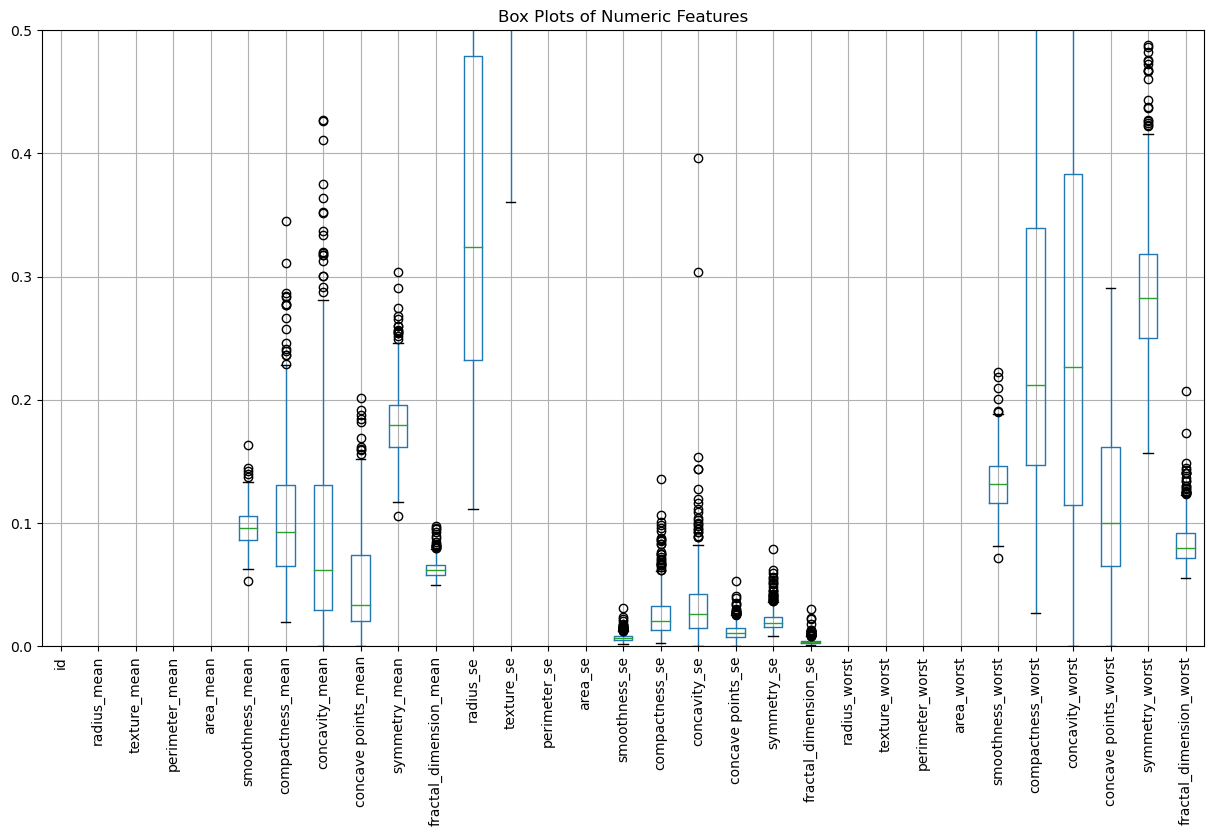

In [4]:

plt.figure(figsize=(15, 8))
data.boxplot()
plt.xticks(rotation=90)
plt.ylim(0, 0.5)
plt.title('Box Plots of Numeric Features')
plt.show()


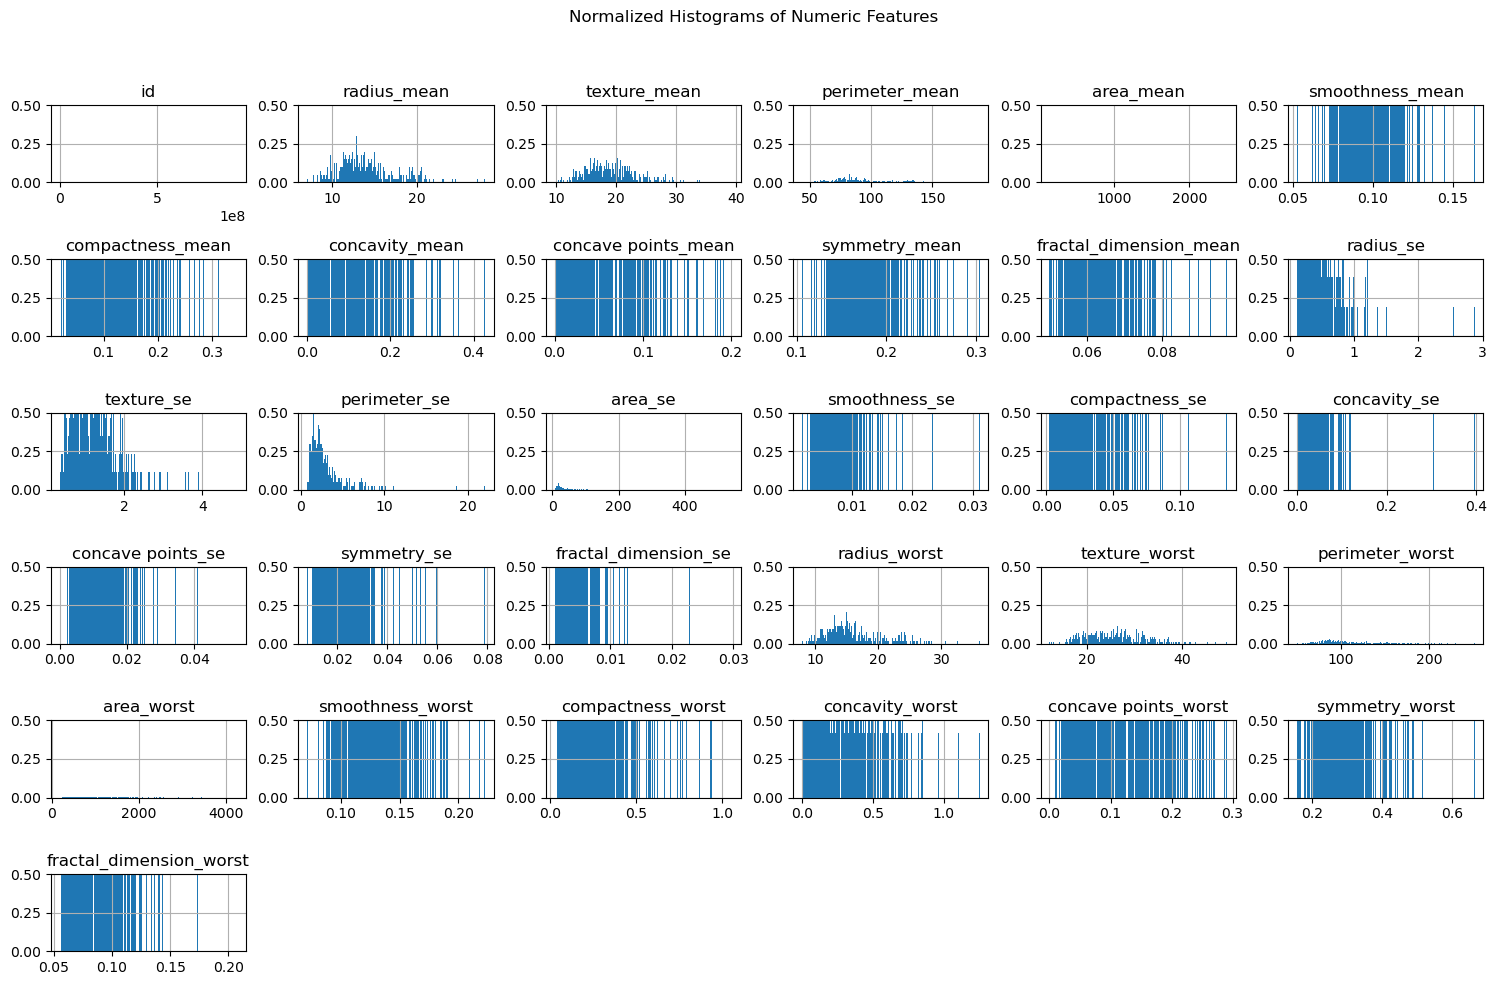

In [5]:

data.hist(bins=300, figsize=(15, 10), density=True)
plt.suptitle('Normalized Histograms of Numeric Features')
for ax in plt.gcf().get_axes():
    ax.set_ylim(0, 0.5)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Feature selection

In [7]:
X = data.iloc[:,2:12]
X.head()
y = data[['diagnosis']]
y.head()
y.describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [8]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
y = pd.get_dummies(y, drop_first=True)
y

,diagnosis_M
0,True
1,True
2,True
3,True
4,True
...,...
564,True
565,True
566,True
567,True


In [10]:

all_columns = data.columns.tolist()


columns_to_remove = ['id', 'Unnamed: 32']


for col in columns_to_remove:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Model Initialization

In [13]:

log_reg = LogisticRegression()
svm = SVC()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=2)

In [14]:


models = [log_reg, svm, random_forest, gbm, naive_bayes, knn]
model_names = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting", "Naive Bayes", "KNN (k=2)"]



Model testing

In [15]:

models = [log_reg, svm, random_forest, gbm, naive_bayes, knn]
model_names = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting", "Naive Bayes", "KNN (k=2)"]


for current_model, current_model_name in zip(models, model_names):
    
    current_model.fit(X_train, y_train)

    
    train_predictions = current_model.predict(X_train)
    test_predictions = current_model.predict(X_test)
    
   
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    
    precision = precision_score(y_test, test_predictions, average='weighted')
    recall = recall_score(y_test, test_predictions, average='weighted')
    f1 = f1_score(y_test, test_predictions, average='weighted')

    
    print(f"Results after evaluating {current_model_name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {precision:.4f}")
    print(f"Testing Recall: {recall:.4f}")
    print(f"Testing F1 Score: {f1:.4f}")
    print("\n")


C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results after evaluating Logistic Regression:
Training Accuracy: 0.9447
Testing Accuracy: 0.9357
Testing Precision: 0.9355
Testing Recall: 0.9357
Testing F1 Score: 0.9356


Results after evaluating SVM:
Training Accuracy: 0.9598
Testing Accuracy: 0.9649
Testing Precision: 0.9656
Testing Recall: 0.9649
Testing F1 Score: 0.9647


Results after evaluating Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.9532
Testing Precision: 0.9532
Testing Recall: 0.9532
Testing F1 Score: 0.9532




C:\Users\saite\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results after evaluating Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.9591
Testing Precision: 0.9601
Testing Recall: 0.9591
Testing F1 Score: 0.9593


Results after evaluating Naive Bayes:
Training Accuracy: 0.9121
Testing Accuracy: 0.9240
Testing Precision: 0.9238
Testing Recall: 0.9240
Testing F1 Score: 0.9236


Results after evaluating KNN (k=2):
Training Accuracy: 0.9573
Testing Accuracy: 0.9357
Testing Precision: 0.9392
Testing Recall: 0.9357
Testing F1 Score: 0.9345




C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Results

C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

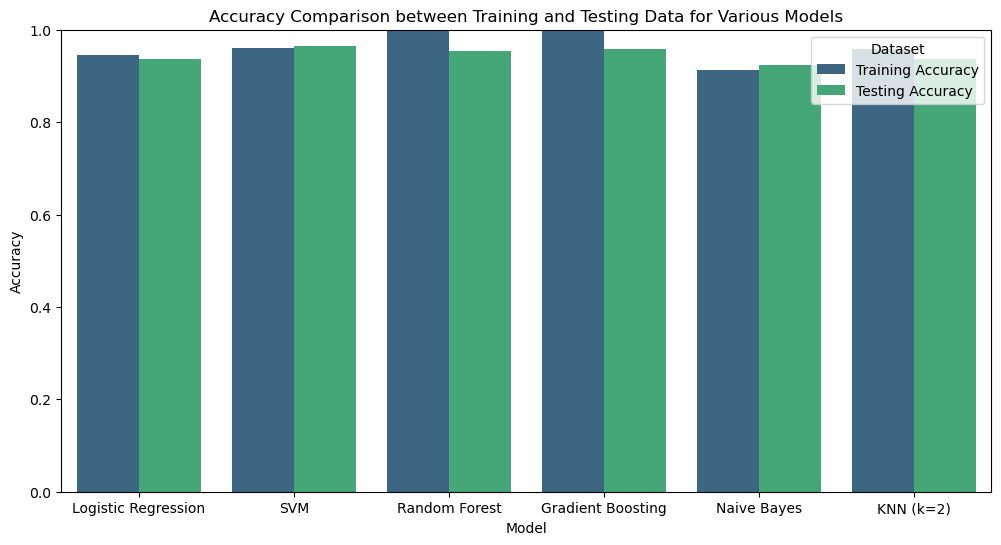

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


model_performance = []

for current_model, current_model_name in zip(models, model_names):
    
    current_model.fit(X_train, y_train)

    
    train_predictions = current_model.predict(X_train)
    test_predictions = current_model.predict(X_test)
    
  
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

   
    model_performance.append({
        'Model': current_model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    })


df = pd.DataFrame(model_performance)


df_melted = df.melt(id_vars='Model', var_name='Dataset', value_name='Accuracy')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Dataset', palette='viridis')
plt.title('Accuracy Comparison between Training and Testing Data for Various Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()


C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\saite\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

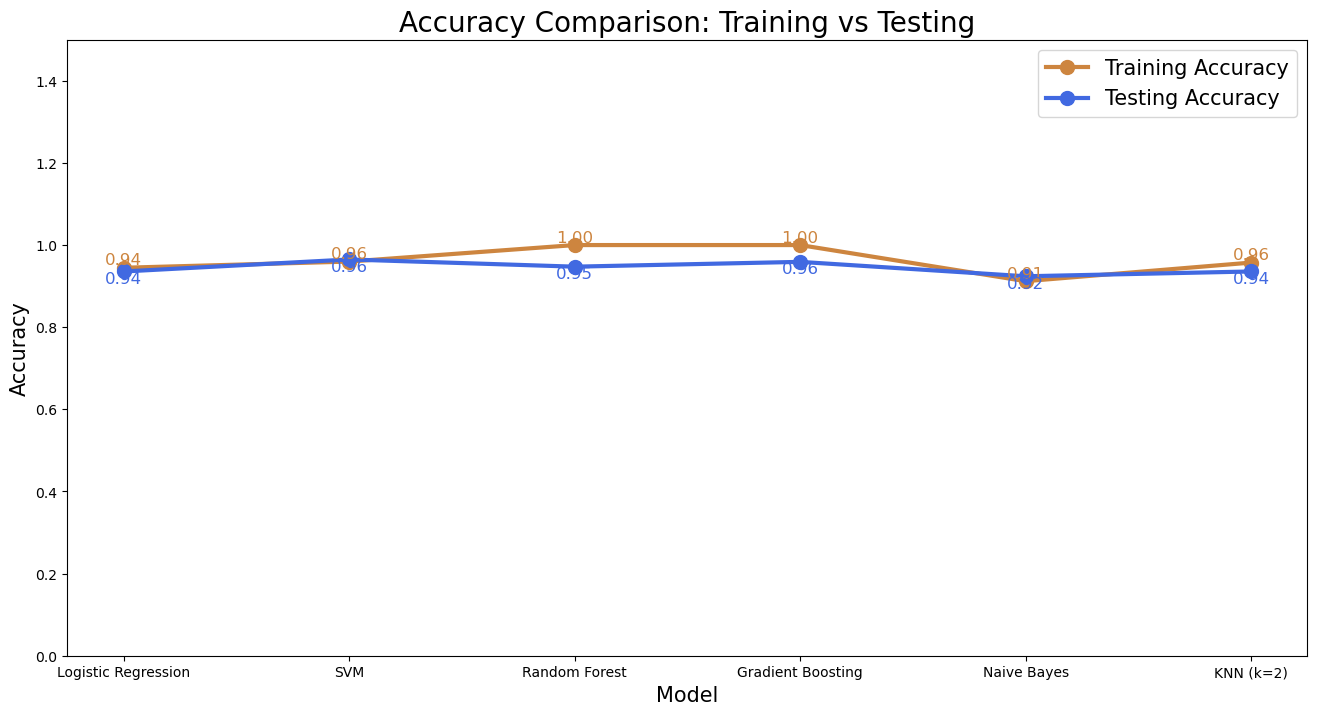

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


model_performance = []

for current_model, current_model_name in zip(models, model_names):
    
    current_model.fit(X_train, y_train)

   
    train_predictions = current_model.predict(X_train)
    test_predictions = current_model.predict(X_test)
    
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    
    model_performance.append({
        'Model': current_model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    })


df = pd.DataFrame(model_performance)


plt.figure(figsize=(16, 8))
plt.plot(df['Model'], df['Training Accuracy'], label='Training Accuracy', color='peru', marker='o', markersize=10, linewidth=3)
plt.plot(df['Model'], df['Testing Accuracy'], label='Testing Accuracy', color='royalblue', marker='o', markersize=10, linewidth=3)


for i, model_name in enumerate(df['Model']):
    plt.text(i, df['Training Accuracy'][i], f"{df['Training Accuracy'][i]:.2f}", ha='center', va='bottom', fontsize=12, color='peru')
    plt.text(i, df['Testing Accuracy'][i], f"{df['Testing Accuracy'][i]:.2f}", ha='center', va='top', fontsize=12, color='royalblue')

plt.title('Accuracy Comparison: Training vs Testing', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0, 1.5) 
plt.legend(fontsize=15)
plt.show()
